# 数据挖掘课程作业1：数据探索性分析与数据预处理

计算机学院 3120220933 郭文轩

本次作业中，自行选择2个数据集进行探索性分析与预处理。

数据集：GitHub Dataset 和 Alzheimer Disease and Healthy Aging Data in US。


## 1. GitHub Dataset

导入所使用的库和数据集。

我们使用pandas进行数据处理和分析，matplotlib进行数据可视化。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据集，默认第一行为表头，header和names不需要指定
data = pd.read_csv('./data/GitHub Dataset/github_dataset.csv')


### 1.1 数据摘要和可视化

- 数据摘要

标称属性（本数据集为language列），给出每个可能取值的频数

数值属性（本数据集为stars_count、forks_count、issues_count、pull_requests、contributors列），给出5数概括及缺失值的个数

In [2]:
# 标称属性，统计每个类别的频数
freq = data['language'].value_counts()
print(freq)


JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
Jupyter Notebook     29
C++                  29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Swift                10
Rust                 10
Objective-C           8
C#                    8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
Solidity              3
CoffeeScript          3
Dockerfile            3
Perl                  3
AutoHotkey            3
Pawn                  2
CodeQL                2
Vue                   2
PowerShell            2
Assembly              2
Elixir                2
Hack                  2
Vim Script            2
Oz                    1
Smarty                1
Svelte                1
Less                  1
HCL                   1
R                     1
Haskell         

In [3]:
# 数值属性，进行描述性统计
summary = data.describe()
print(summary)

print()

# 计算缺失值个数
missing = data.isnull().sum()
print(missing)


       stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
mean     81.976236    53.884981      8.656844       4.374525      8.364068
std     170.403116   127.699729     32.445154      27.913732     37.511807
min       0.000000     0.000000      1.000000       0.000000      0.000000
25%       1.000000     1.000000      1.000000       0.000000      0.000000
50%      12.000000     6.000000      2.000000       0.000000      2.000000
75%      65.250000    38.250000      6.000000       2.000000      4.000000
max     995.000000   973.000000    612.000000     567.000000    658.000000

repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64


- 数据可视化

使用直方图、盒图等检查数据分布及离群点

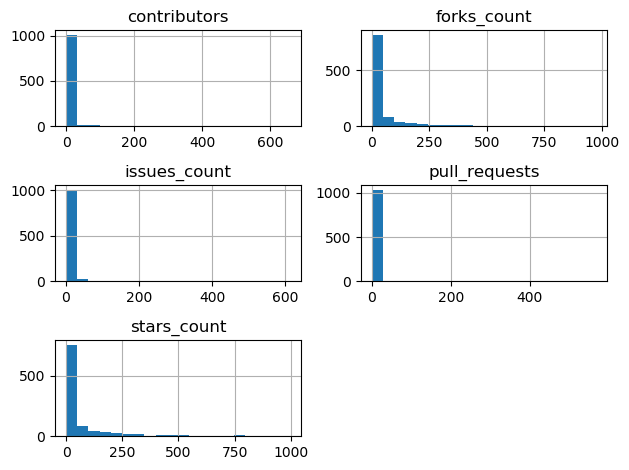

In [4]:
# 直方图
data.hist(bins=20)
plt.tight_layout()
plt.show()


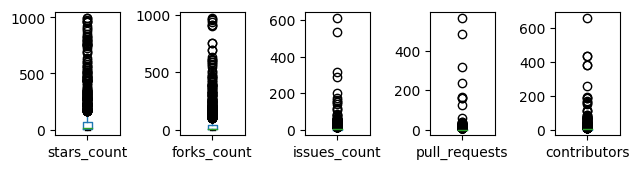

In [5]:
# 盒图
data.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


根据如上结果，我们发现issues_count、pull_requests、contributors存在离群点。我们以issues_count为例，对离群点进行探索。

In [6]:
# 查找issues_count的离群点
q1, q3 = data['issues_count'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['issues_count'] < lower_bound) | (data['issues_count'] > upper_bound)]
print(outliers)


                                repositories  stars_count  forks_count  \
0                        octocat/Hello-World            0            0   
1                  EddieHubCommunity/support          271          150   
2                             ethereum/aleth            0            0   
3                      localstack/localstack            0            0   
4                        education/classroom            0          589   
..                                       ...          ...          ...   
123  adrianhajdin/project_medical_pager_chat          968          336   
124                       trailofbits/blight           63            5   
125                        antonmedv/codejar            0           87   
126          education/GitHubGraduation-2021            0            0   
127                         defuse/defuse.ca           53           17   

     issues_count  pull_requests  contributors    language  
0             612            316             2    

## 1.2 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除

- 用最高频率值来填补缺失值

- 通过属性的相关关系来填补缺失值

- 通过数据对象之间的相似性来填补缺失值

注意：在处理后完成，要对比新旧数据集的差异。


In [7]:
# 首先，先回顾一下数据集中数据缺失的情况

# 计算缺失值个数
missing = data.isnull().sum()
print(missing)

repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64


可以看到，数据缺失的情况集中在language字段。

In [8]:
# 策略1：将缺失部分剔除

# 删除包含缺失值的行
data1 = data.dropna()

# 比较处理前后数据集的差异
print(data.shape)
print()
print(data1.shape)


(1052, 7)

(907, 7)


In [9]:
# 策略2：用最高频率值来填补缺失值

# 找出最高频率值
mode = data['language'].mode()[0]

# 填补缺失值
data2 = data.fillna({'language': mode})

# 比较处理前后数据集的差异
print(data['language'].describe())
print()
print(data2['language'].describe())


count            907
unique            51
top       JavaScript
freq             253
Name: language, dtype: object

count           1052
unique            51
top       JavaScript
freq             398
Name: language, dtype: object


In [10]:
# 策略3：通过属性的相关关系来填补缺失值

# 由于缺失字段language为标称属性，无法计算属性的相关关系，略。

In [11]:
# 策略4：通过数据对象之间的相似性来填补缺失值

# 由于缺失字段language为标称属性，无法计算数据对象之间的相似性，略。

对比新旧数据集的差异如下

In [12]:
# 比较填补前后数据集的差异
print('将缺失部分剔除：')
print(data.dropna().describe() - data.drop(columns=['language']).describe())
print(data.dropna().describe() - data1.describe())
print()
print('用最高频率值来填补缺失值：')
print(data.dropna().describe() - data.drop(columns=['language']).describe())
print(data.dropna().describe() - data2.describe())
print()
print('通过属性的相关关系来填补缺失值：')
print('无法计算，原因见上。')
print()
print('通过数据对象之间的相似性来填补缺失值：')
print('无法计算，原因见上。')


将缺失部分剔除：
       stars_count  forks_count  issues_count  pull_requests  contributors
count  -145.000000  -145.000000   -145.000000    -145.000000   -145.000000
mean     -3.112950    -2.645731     -0.788046      -1.299552      0.771543
std      -4.578443    -2.779370    -10.360144     -16.531215      2.643140
min       0.000000     0.000000      0.000000       0.000000      0.000000
25%       0.000000     0.000000      0.000000       0.000000      0.000000
50%      -1.000000     0.000000      0.000000       0.000000      0.000000
75%      -5.250000    -3.250000      0.000000       0.000000      1.000000
max     -18.000000     0.000000   -299.000000    -403.000000      0.000000
       stars_count  forks_count  issues_count  pull_requests  contributors
count          0.0          0.0           0.0            0.0           0.0
mean           0.0          0.0           0.0            0.0           0.0
std            0.0          0.0           0.0            0.0           0.0
min            0

## 2. Alzheimer Disease and Healthy Aging Data In US

导入所使用的库和数据集。

我们使用pandas进行数据处理和分析，matplotlib进行数据可视化。

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据集，默认第一行为表头，header和names不需要指定
data = pd.read_csv('./data/Alzheimer Disease and Healthy Aging Data In US.csv')


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3229: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2.1 数据摘要和可视化

- 数据摘要

标称属性，给出每个可能取值的频数

数值属性，给出5数概括及缺失值的个数

In [14]:
# 标称属性，统计每个类别的频数
list = ['LocationAbbr','LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Type']

for item in list:
    print("----------")
    print(item)
    freq = data[item].value_counts()
    print(freq)
    print()


----------
LocationAbbr
US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
WA      3348
MT      3348
DE      3346
NH      3284
VT      3278
MA      3174
PR      2797
GU      2703
VI       503
Name: LocationAbbr, dtype: int64

----------
LocationDesc
United States, DC & Territories    4644
West                               4638
Northeast                          4614
Midwest                        

In [15]:
# 数值属性，进行描述性统计
summary = data.describe()
print(summary)

print()

# 计算缺失值个数
missing = data.isnull().sum()
print(missing)


           YearStart        YearEnd     Data_Value  Data_Value_Alt  \
count  214462.000000  214462.000000  144629.000000   144629.000000   
mean     2017.378477    2017.634000      37.341956       37.341956   
std         1.779822       1.778926      25.183017       25.183017   
min      2015.000000    2015.000000       0.000000        0.000000   
25%      2016.000000    2016.000000      15.300000       15.300000   
50%      2017.000000    2018.000000      32.500000       32.500000   
75%      2019.000000    2019.000000      56.800000       56.800000   
max      2020.000000    2020.000000     100.000000      100.000000   

       Sample_Size     LocationID  
count          0.0  214462.000000  
mean           NaN     800.987821  
std            NaN    2512.934094  
min            NaN       1.000000  
25%            NaN      18.000000  
50%            NaN      33.000000  
75%            NaN      49.000000  
max            NaN    9004.000000  

YearStart                         0
YearEnd 

- 数据可视化

使用直方图、盒图等检查数据分布及离群点

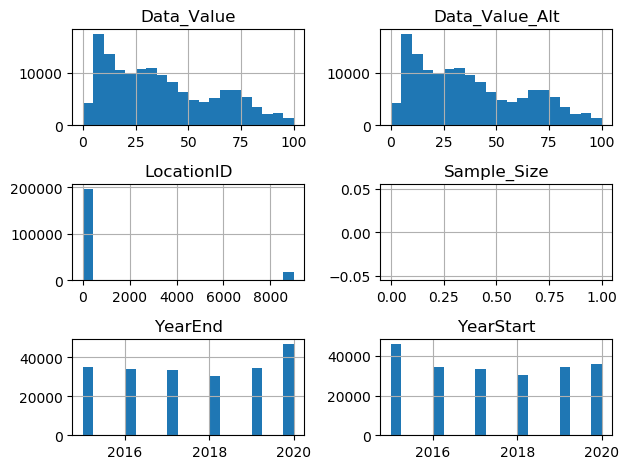

In [16]:
# 直方图
data.hist(bins=20)
plt.tight_layout()
plt.show()


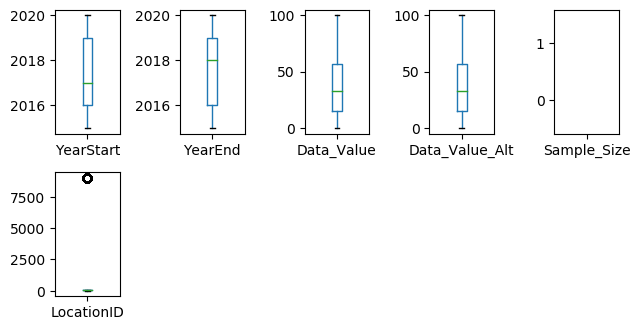

In [17]:
# 盒图
data.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


根据如上结果，我们发现LocationID存在离群点。

In [18]:
# 查找LocationID的离群点
q1, q3 = data['LocationID'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['LocationID'] < lower_bound) | (data['LocationID'] > upper_bound)]
print(outliers)


        YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
19           2019     2019          MDW      Midwest      BRFSS   
20           2020     2020          NRE    Northeast      BRFSS   
21           2020     2020          SOU        South      BRFSS   
22           2019     2019          SOU        South      BRFSS   
23           2020     2020         WEST         West      BRFSS   
...           ...      ...          ...          ...        ...   
211547       2017     2017         WEST         West      BRFSS   
211548       2015     2015         WEST         West      BRFSS   
211549       2015     2015         WEST         West      BRFSS   
211555       2015     2015         WEST         West      BRFSS   
211558       2018     2018         WEST         West      BRFSS   

                          Class  \
19                Mental Health   
20      Smoking and Alcohol Use   
21               Overall Health   
22      Smoking and Alcohol Use   
23               Ove

## 2.2 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除

- 用最高频率值来填补缺失值

- 通过属性的相关关系来填补缺失值

- 通过数据对象之间的相似性来填补缺失值

注意：在处理后完成，要对比新旧数据集的差异。


In [19]:
# 首先，先回顾一下数据集中数据缺失的情况

# 计算缺失值个数
missing = data.isnull().sum()
print(missing)

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit                   0
DataValueTypeID                   0
Data_Value_Type                   0
Data_Value                    69833
Data_Value_Alt                69833
Low_Confidence_Limit          69990
High_Confidence_Limit         69990
Sample_Size                  214462
StratificationCategory1           0
Stratification1                   0
StratificationCategory2       27669
Stratification2               27669
Geolocation                   23049
ClassID                           0
TopicID                           0
QuestionID                        0
LocationID                        0
StratificationCategoryID1         0
StratificationID1                 0
StratificationCategoryID2   

以Data_Value字段为例，进行处理。

In [20]:
# 策略1：将缺失部分剔除

# 删除包含缺失值的行
data1 = data.dropna()

# 比较处理前后数据集的差异
print(data.shape)
print()
print(data1.shape)


(214462, 29)

(0, 29)


发现每个数据都有缺失的字段，这样操作直接删除了全部数据……

In [21]:
# 策略2：用最高频率值来填补缺失值

# 找出最高频率值
mode = data['Data_Value'].mode()[0]

# 填补缺失值
data2 = data.fillna({'Data_Value': mode})

# 比较处理前后数据集的差异
print(data['Data_Value'].describe())
print()
print(data2['Data_Value'].describe())


count    144629.000000
mean         37.341956
std          25.183017
min           0.000000
25%          15.300000
50%          32.500000
75%          56.800000
max         100.000000
Name: Data_Value, dtype: float64

count    214462.000000
mean         27.136405
std          25.365139
min           0.000000
25%           6.000000
50%          15.900000
75%          42.100000
max         100.000000
Name: Data_Value, dtype: float64


In [28]:
# 策略3：通过属性的相关关系来填补缺失值

import numpy as np

# 计算相关系数
corr = data.corr()['Data_Value'][['Low_Confidence_Limit', 'High_Confidence_Limit']]

# 找出线性回归方程中的常数项和系数
X = data.dropna(subset=['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit'])[['Low_Confidence_Limit', 'High_Confidence_Limit']]
y = data.dropna(subset=['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit'])['Data_Value']
coef = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# 填补缺失值
data3 = data.copy()
for index, row in data3.iterrows():
    if np.isnan(row['Data_Value']):
        low = row['Low_Confidence_Limit']
        high = row['High_Confidence_Limit']
        data3.at[index, 'Data_Value'] = coef[0] * low + coef[1] * high

# 比较处理前后数据集的差异
print(data['Data_Value'].describe())
print(data3['Data_Value'].describe())


In [29]:
# 策略4：通过数据对象之间的相似性来填补缺失值

# 计算距离矩阵
from scipy.spatial.distance import pdist, squareform
import numpy as np

d = squareform(pdist(data.drop(columns=['Data_Value']).dropna(), metric='euclidean'))

# 寻找最近邻
k = 5
nn = np.argsort(d)[:, 1:k+1]

# 填补缺失值
data4 = data.copy()
for index, row in data4.iterrows():
    if np.isnan(row['Data_Value']):
        neighbors = nn[index]
        values = data4.iloc[neighbors]['Data_Value']
        imputed_value = values.mean()
        data4.at[index, 'Data_Value'] = imputed_value

# 比较处理前后数据集的差异
print(data['Data_Value'].describe())
print(data4['Data_Value'].describe())


对比新旧数据集的差异如下

In [27]:
# 比较填补前后数据集的差异
print('将缺失部分剔除：')
print(data.dropna().describe() - data.drop(columns=['Data_Value']).describe())
print(data.dropna().describe() - data1.describe())
print()
print('用最高频率值来填补缺失值：')
print(data.dropna().describe() - data.drop(columns=['Data_Value']).describe())
print(data.dropna().describe() - data2.describe())
print()
print('通过属性的相关关系来填补缺失值：')
print('无法计算，原因见上。')
print()
print('通过数据对象之间的相似性来填补缺失值：')
print('无法计算，原因见上。')


将缺失部分剔除：
       Data_Value  Data_Value_Alt  LocationID  Sample_Size   YearEnd  \
count         NaN       -144629.0   -214462.0          0.0 -214462.0   
mean          NaN             NaN         NaN          NaN       NaN   
std           NaN             NaN         NaN          NaN       NaN   
min           NaN             NaN         NaN          NaN       NaN   
25%           NaN             NaN         NaN          NaN       NaN   
50%           NaN             NaN         NaN          NaN       NaN   
75%           NaN             NaN         NaN          NaN       NaN   
max           NaN             NaN         NaN          NaN       NaN   

       YearStart  
count  -214462.0  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN  
       YearStart  YearEnd  Data_Value  Data_Value_Alt  Sample_Size  LocationID
count        0.0      0.0         0.0             0.0          0.0         0.0
mean         